# Diabetes Predictor - Binary Classification Project
This project builds a machine learning model to predict diabetes using the Pima Indians Diabetes Dataset. The goal is to create a model with high accuracy that avoids both underfitting and overfitting.

Project Structure
- diabetes_predictor.ipynb: Jupyter notebook with the complete code

- requirements.txt: List of Python dependencies

- README.md: This documentation file

## Step-by-Step Implementation
### 1. Import Required Libraries



We'll start by importing all necessary Python libraries.

In [3]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For saving the model
import joblib
import pickle

### 2. Load and Explore the Dataset
The Pima Indians Diabetes Dataset contains several medical predictor variables and one target variable (Outcome).

In [4]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display first few rows
print(df.head())

# Check dataset information
print(df.info())

# Check basic statistics
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

### 3. Data Preprocessing
We need to clean and prepare the data for modeling.

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Outcome
0    500
1    268
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_13760\60134479.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_13760\60134479.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

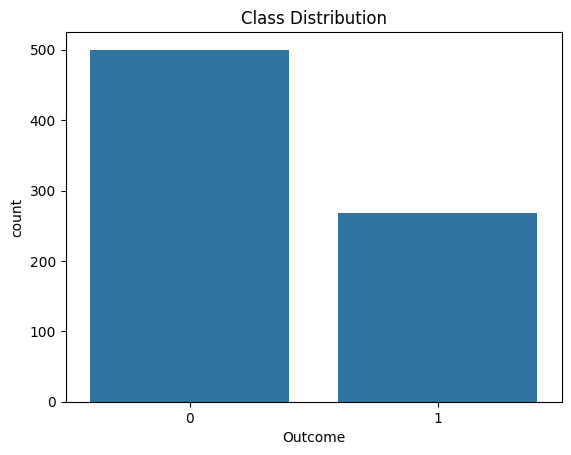

In [5]:
# Check for missing values (represented as 0 in some features)
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

# Replace 0 values with NaN and then impute with median
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

# Fill missing values with median
for column in columns_to_clean:
    df[column].fillna(df[column].median(), inplace=True)

# Check the distribution of the target variable
print(df['Outcome'].value_counts())

# Visualize the distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()

### 4. Feature Engineering
We'll analyze and prepare the features for modeling.

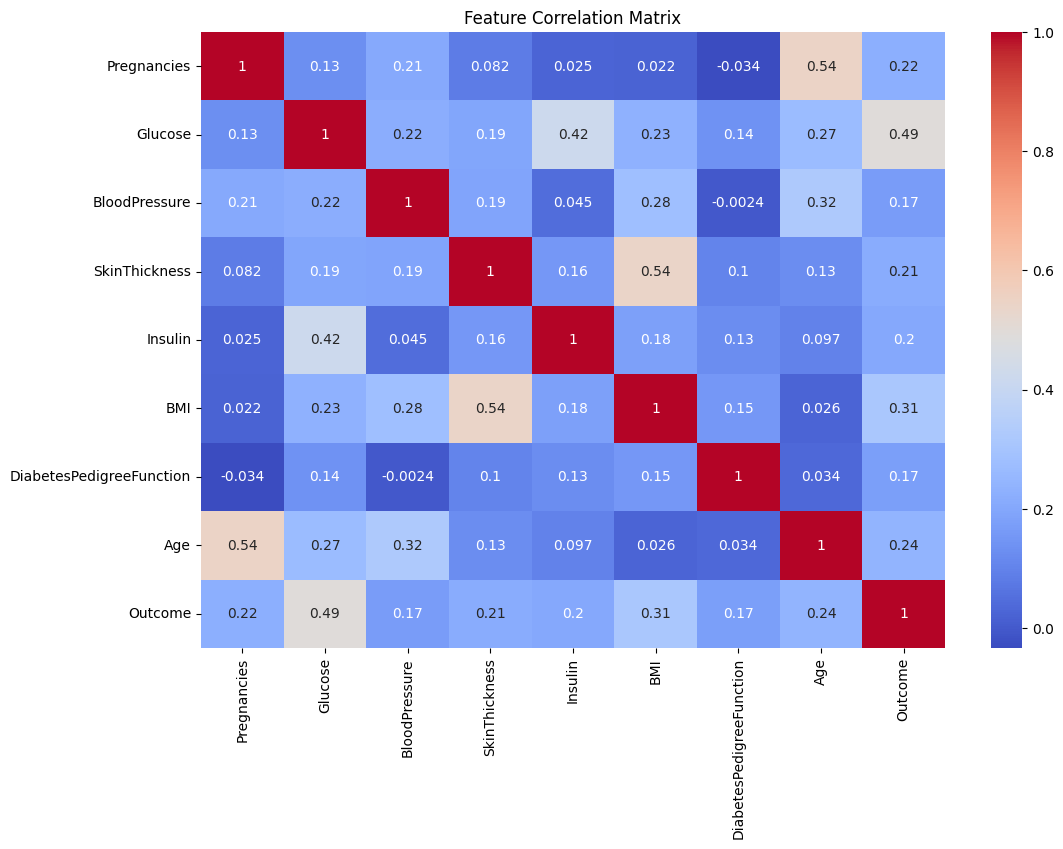

In [6]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Model Selection and Training
We'll evaluate multiple models to find the best performer.

In [7]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'report': report
    }
    
    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(report)
    print("="*60)

Logistic Regression Results:
Accuracy: 0.7350
ROC AUC: 0.8277
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       100
           1       0.74      0.73      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

Decision Tree Results:
Accuracy: 0.8150
ROC AUC: 0.8150
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.81      0.82      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

Random Forest Results:
Accuracy: 0.8150
ROC AUC: 0.9113
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       100
           1       0.80      0.84      0.82       100

    accu

### 6. Hyperparameter Tuning
We'll optimize the best performing model using GridSearchCV.

In [8]:
# Select the best model based on previous results
best_model_name = 'Random Forest'  # Example - replace with your best model
best_model = results[best_model_name]['model']

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get best model
tuned_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_tuned = tuned_model.predict(X_test_scaled)
y_prob_tuned = tuned_model.predict_proba(X_test_scaled)[:, 1]

print("Tuned Model Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_tuned):.4f}")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tuned Model Results:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8050
ROC AUC: 0.9099
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.79      0.83      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



### 7. Model Evaluation
We'll thoroughly evaluate the final model.

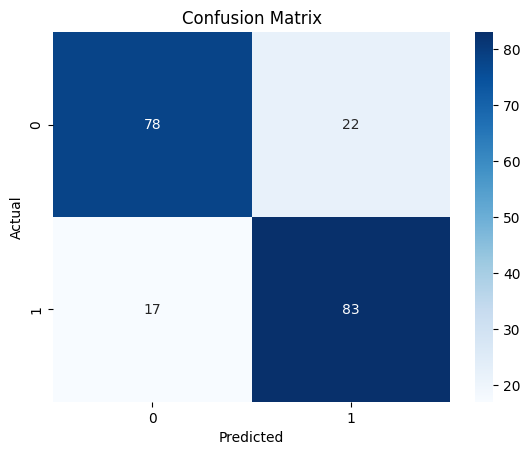

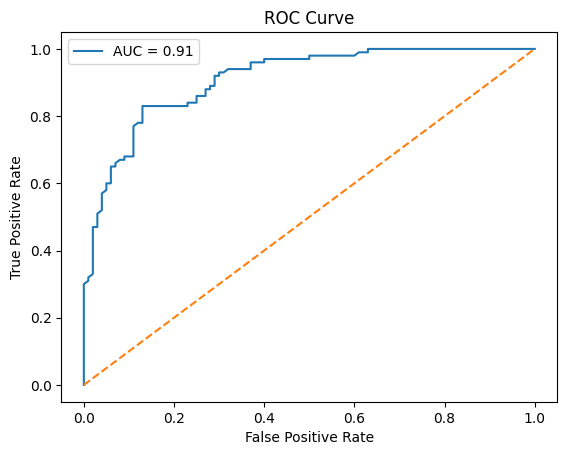

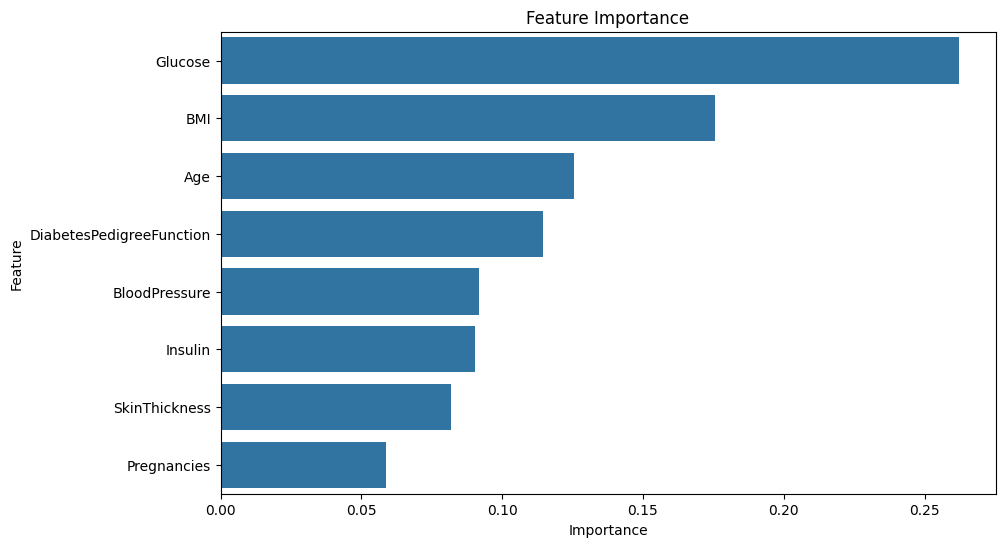

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tuned)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob_tuned):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importance
if hasattr(tuned_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': tuned_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

### 8. Save the Model
We'll save the final model and scaler for future use.

In [10]:
# Save the model
joblib.dump(tuned_model, 'diabetes_predictor_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save as pickle file
with open('diabetes_predictor.pkl', 'wb') as f:
    pickle.dump(tuned_model, f)